**Exercice 1   — Diabet Prediction with Decision Tree**

1.  Charger les données “diabetes.csv”

In [23]:
import pandas as pd

# Charger les données diabetes.csv
data = pd.read_csv("diabetes.csv")



2.  Afficher quelques images.

In [24]:
print(data.head())

print(data.info())

print(data.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

3.  Proposer deux modèles basés sur les arbres de décisions.

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles de formation et de test
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


le modèle CART

In [26]:


cart_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# Ajuster le modèle sur les données d'entraînement
cart_model.fit(X_train, y_train)

# Prédire la classe des données de test
y_pred_cart = cart_model.predict(X_test)

# Évaluer les performances du modèle
from sklearn.metrics import accuracy_score


le modèle GINI

In [27]:

gini_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# Ajuster le modèle sur les données d'entraînement
gini_model.fit(X_train, y_train)

# Prédire la classe des données de test
y_pred_gini = gini_model.predict(X_test)



4.  Comparer ces deux modèles avec la régression logistique

In [28]:
from sklearn.linear_model import LogisticRegression

# Créer le modèle de régression logistique
logistic_model = LogisticRegression(random_state=42)

# Ajuster le modèle sur les données d'entraînement
logistic_model.fit(X_train, y_train)

# Prédire la classe des données de test
y_pred_logistic = logistic_model.predict(X_test)



/home/o/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
from sklearn.metrics import f1_score, precision_score, recall_score


print("Accuracy score:")
print("CART:", accuracy_score(y_test, y_pred_cart))
print("Gini:", accuracy_score(y_test, y_pred_gini))
print("Logistic Regression:", accuracy_score(y_test, y_pred_logistic))

print("\nPrecision score:")
print("CART:", precision_score(y_test, y_pred_cart))
print("Gini:", precision_score(y_test, y_pred_gini))
print("Logistic Regression:", precision_score(y_test, y_pred_logistic))

print("\nRecall score:")
print("CART:", recall_score(y_test, y_pred_cart))
print("Gini:", recall_score(y_test, y_pred_gini))
print("Logistic Regression:", recall_score(y_test, y_pred_logistic))

print("\nF1 score:")
print("CART:", f1_score(y_test, y_pred_cart))
print("Gini:", f1_score(y_test, y_pred_gini))
print("Logistic Regression:", f1_score(y_test, y_pred_logistic))







Accuracy score:
CART: 0.7597402597402597
Gini: 0.7662337662337663
Logistic Regression: 0.7402597402597403

Precision score:
CART: 0.68
Gini: 0.6862745098039216
Logistic Regression: 0.631578947368421

Recall score:
CART: 0.6181818181818182
Gini: 0.6363636363636364
Logistic Regression: 0.6545454545454545

F1 score:
CART: 0.6476190476190475
Gini: 0.660377358490566
Logistic Regression: 0.6428571428571428


5.  Visualiser les résultats comparatifs graphiquement.

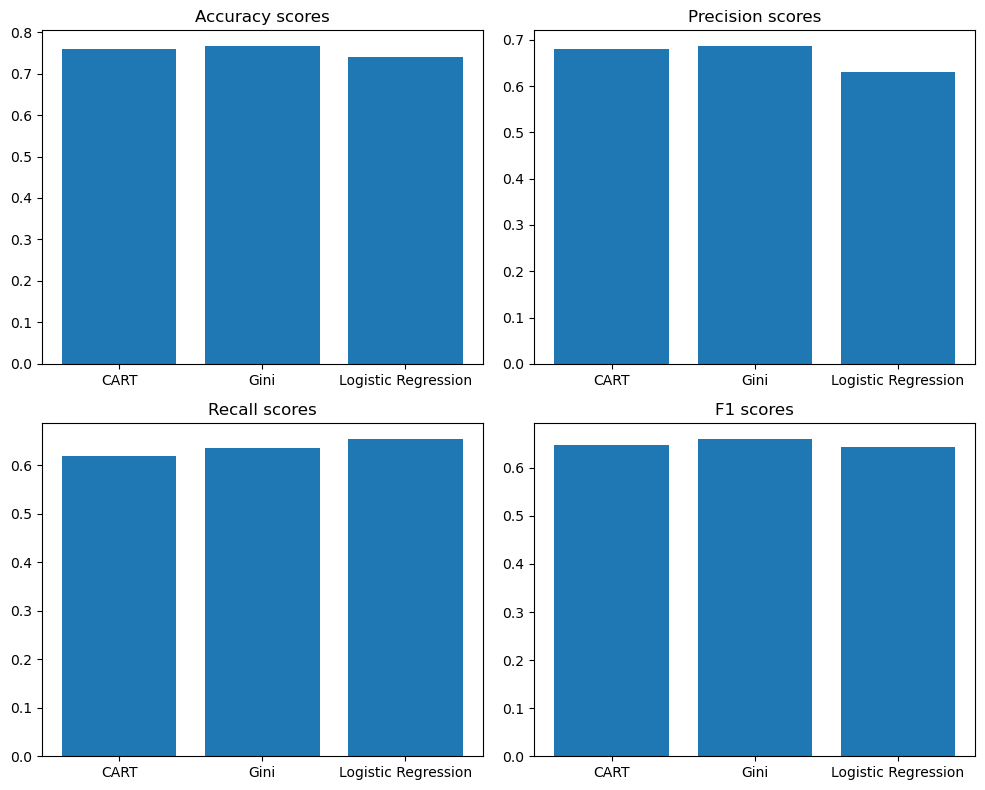

In [32]:
import matplotlib.pyplot as plt

# Accuracy scores
accuracy_scores = [accuracy_score(y_test, y_pred_cart), accuracy_score(y_test, y_pred_gini), accuracy_score(y_test, y_pred_logistic)]
# Precision scores
precision_scores = [precision_score(y_test, y_pred_cart), precision_score(y_test, y_pred_gini), precision_score(y_test, y_pred_logistic)]
# Recall scores
recall_scores = [recall_score(y_test, y_pred_cart), recall_score(y_test, y_pred_gini), recall_score(y_test, y_pred_logistic)]
# F1 scores
f1_scores = [f1_score(y_test, y_pred_cart), f1_score(y_test, y_pred_gini), f1_score(y_test, y_pred_logistic)]

# Labels for x-axis
labels = ["CART", "Gini", "Logistic Regression"]

# Creating subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Bar chart for accuracy scores
axs[0, 0].bar(labels, accuracy_scores)
axs[0, 0].set_title("Accuracy scores")

# Bar chart for precision scores
axs[0, 1].bar(labels, precision_scores)
axs[0, 1].set_title("Precision scores")

# Bar chart for recall scores
axs[1, 0].bar(labels, recall_scores)
axs[1, 0].set_title("Recall scores")

# Bar chart for F1 scores
axs[1, 1].bar(labels, f1_scores)
axs[1, 1].set_title("F1 scores")

# Adjusting layout
plt.tight_layout()

# Displaying the plot
plt.show()


6.  Conclusion

on peut conclure que les modèles basés sur les arbres de décision (CART et Gini) ont une performance légèrement supérieure à celle de la régression logistique pour prédire le diabète chez les patients. Cependant, la différence entre les scores est assez faible, donc il peut être intéressant de tester d'autres modèles ou de procéder à une sélection de caractéristiques pour améliorer encore la performance de la classification. Il convient également de noter que ces résultats peuvent varier selon la méthode de validation utilisée et le jeu de données utilisé.